In [2]:
#run this cell once
%matplotlib notebook

# Part II

# Assignment 10

prerequisites : 
- basic understanding of Jupyter notebooks (https://jupyter.org/)
- basic understanding of binder (https://mybinder.org/)
- GitHub account (https://github.com/)
- understanding the 'range' function (https://www.w3schools.com/python/ref_func_range.asp)
- understanding the 'while' loop (https://www.w3schools.com/python/python_while_loops.asp) 
- understanding of the 'if' statement  (https://www.w3schools.com/python/python_conditions.asp)
- Following functions and datatypes :<a href="https://www.w3schools.com/python/ref_func_print.asp">print</a>,<a href="https://www.w3schools.com/python/ref_func_input.asp">input</a>,<a href="https://www.w3schools.com/python/python_datatypes.asp">datatypes</a>
- A walkthrough of some of the important <a href="https://codeinplace2021.github.io/pythonreader/en/variables/">data types and python operators  </a><br><br>
Resources :
- A walkthrough of some of the important <a href="https://codeinplace2021.github.io/pythonreader/en/variables/">data types and python operators  </a>
- <a href="https://www.w3schools.com/python/python_functions.asp">Functions </a>
- The <a href="https://www.w3schools.com/python/ref_func_range.asp">Range function</a> 
- <a href="https://www.w3schools.com/python/python_lists.asp">Lists</a>,<a href="https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp">Arrays</a>,<a href="https://www.w3schools.com/python/python_dictionaries.asp">Dictionaries</a>
- <a href="https://www.w3schools.com/python/python_file_handling.asp">Python File Operations</a>
- <a href="https://pandas.pydata.org/docs/reference/index.html">Pandas</a>
- <a href="https://matplotlib.org/">matplotlib</a>

# Matplotlib
Matplotlib is a graphing and charting library in Python


In [144]:
# Here are some examples of  pandas file operations.Copy each statement into a separate cell and run individually to understand the functionality
#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
import pandas as pd
data=pd.read_csv('covid.csv')
pd_f1=pd.DataFrame(data)
pd_f1
# transpose date fields 
pd_main=pd.melt(pd_f1, id_vars=['Province/State','Country/Region','Lat','Long'])
# rename some of the columns
pd_main=pd_main.rename(columns={'variable':'Rep_Date','value':'Counts','Province/State':'State','Country/Region':'Country'})
print("Total Row Count", len(pd_main))
#add a column https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
pd_main['marginal']=0
#string operations https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
rep_data_split=pd_main['Rep_Date'].str.split("/",n = 2, expand = True)
pd_main['Rep_Month']=rep_data_split[0]
pd_main['Rep_Day']=rep_data_split[1]
pd_main['Rep_Year']=rep_data_split[2]
pd_main['str_Rep_Year_Month']=rep_data_split[2]+'_'+rep_data_split[0]
#casting columns to int
pd_main=pd_main.astype({'Rep_Year': 'int64','Rep_Month':'int64','Rep_Day':'int64'})
pd_main.iloc[:,0:6] # select rows and columns to display 
#using a filter on a column
pd_main[pd_main['Country'].isin(['Angola','India'])]
#using a filter across columns
#https://datascienceparichay.com/article/pandas-filter-dataframe-for-multiple-conditions/
pd_main[(pd_main['Country'].isin(['Angola','India'])) & (pd_main['Rep_Date'].isin(['1/24/20']))]
# The above can be stored as an index and then retrieved
#l_indx=pd_main[(pd_main['Country'].isin(['Angola','India'])) & (pd_main['Rep_Date'].isin(['1/24/20']))].index
l_indx=pd_main[(pd_main['Country'].isin(['Angola','India'])) & (pd_main['Rep_Date'] >'1/24/21')].index
pd_main.iloc[l_indx]
#update columns 
v_filter=l_indx=pd_main[(pd_main['Country'].isin(['Angola'])) & (pd_main['Rep_Date'].isin(['1/24/20']))].index
pd_main.loc[v_filter, 'Counts']=-1
pd_main.loc[v_filter]
#using the 'where' clause, update a column based on where clause
pd_main['myCol']=pd_main.where(pd_main['Country']=='Angola', 'Other')['Country']
pd_main.loc[pd_main['Country'].isin(['Angola','India'])][:2] #just two rows for the above condition
# Aggregations 
# Sort the data by Country ,Rep_Year and Rep_Month
pd_main=pd_main.sort_values(by=['Country','Rep_Year','Rep_Month','Rep_Day'])
# First add a column (call it 'marginal) to the data to show daily changes
mcol=pd_main.groupby('Country')['Counts'].diff()
pd_main['changes']=mcol
dataAgg=pd_main[['Country','str_Rep_Year_Month','Rep_Year','Rep_Month','changes']].groupby(['Country','str_Rep_Year_Month'],as_index=False).agg({'changes':'sum'})
# merging Data
ndata=pd.merge(pd_main,dataAgg,how='outer',on=['Country','str_Rep_Year_Month'],suffixes=('_m','_n'),indicator=True)
# # sort the data
ndata=ndata.sort_values(by=['Country','Rep_Year','Rep_Month'])
# #https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
# #remove unwanted fields and rename some fields
ndata=ndata.drop(['_merge'],axis=1)
ndata=ndata.rename(columns={'changes_m':'changes','changes_n':'cum_monthly_changes'})
# create columns on the Aggregate Table for sorting Rep_Year and Rep_Month
s=dataAgg['str_Rep_Year_Month'].str.split('_',n=2,expand=True)
dataAgg['Rep_Year']=s[0]
dataAgg['Rep_Month']=s[1]
dataAgg=dataAgg.astype({'Rep_Year':'int64','Rep_Month':'int64'})
dataAgg.dtypes
dataAgg=dataAgg.sort_values(by=['Country','Rep_Year','Rep_Month'])

Total Row Count 154566


<IPython.core.display.Javascript object>


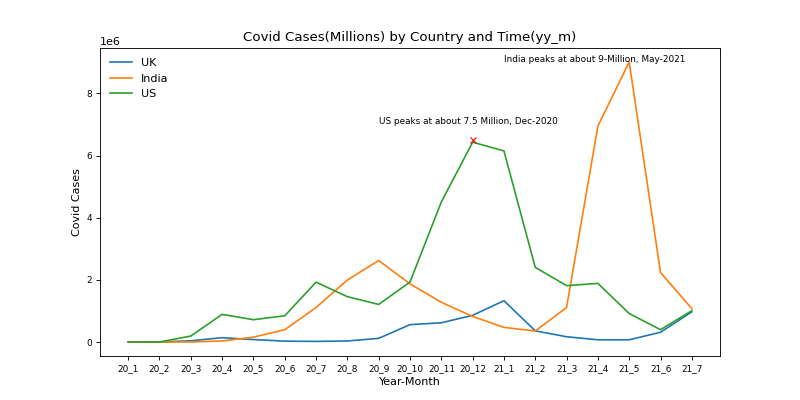

In [211]:
import matplotlib.pyplot as plt #Import the matplotlib library module pyplot which has plotting functions
plt.figure(figsize=(10,5)) # initialize a plot frame which will house the chart
# mention the data for the x-axis and the y-axis. Multiple series can be added 
plt.plot(dataAgg[dataAgg['Country']=='United Kingdom' ]['str_Rep_Year_Month'],dataAgg[dataAgg['Country']=='United Kingdom']['changes'])
plt.plot(dataAgg[dataAgg['Country']=='India' ]['str_Rep_Year_Month'],dataAgg[dataAgg['Country']=='India']['changes'])
plt.plot(dataAgg[dataAgg['Country']=='US' ]['str_Rep_Year_Month'],dataAgg[dataAgg['Country']=='US']['changes'])

# Add Title to the Chart
plt.title('Covid Cases(Millions) by Country and Time(yy_m)')
# Add labels to the axes
plt.xlabel('Year-Month')
plt.ylabel('Covid Cases')
#adjust x,y axis tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# Add Legends 
plt.legend(['UK','India','US'],loc=2,frameon=False) #loc=4 is botton right,2 is top left
# Add Text
plt.text(12,9000000, 'India peaks at about 9-Million, May-2021',fontsize=8)
#Add Marker and text
plt.plot(11,6500000,'rx') # r for red , x marker
plt.text(8,7000000,'US peaks at about 7.5 Million, Dec-2020',fontsize=8);

In [216]:
dataAgg

,Country,str_Rep_Year_Month,changes,Rep_Year,Rep_Month
0,Afghanistan,20_1,0.0,20,1
4,Afghanistan,20_2,1.0,20,2
5,Afghanistan,20_3,174.0,20,3
6,Afghanistan,20_4,1952.0,20,4
7,Afghanistan,20_5,13081.0,20,5
8,Afghanistan,20_6,16299.0,20,6
9,Afghanistan,20_7,5158.0,20,7
10,Afghanistan,20_8,1494.0,20,8
11,Afghanistan,20_9,1109.0,20,9
1,Afghanistan,20_10,2157.0,20,10


In [ ]:
#use the file covid_deaths.csv and try to recreate a chart similar to the one above but now to show the counts of deaths instead of cases


In [ ]:
#start your code from here , you can add code in additional cells if necessary

In [ ]:
# Create a chart to show the deaths/no.of.cases with respect to time (Year-Month) for US,UK,India.

In [ ]:
#start your code from here , you can add code in additional cells if necessary